In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/IR - 21.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [4]:
train = X_train.append(y_train)
train

,DE,FE,Fault
103476,0.062585,0.041091,0
96984,-0.075102,-0.013765,0
114732,-0.048190,-0.001233,0
10916,0.069260,0.028558,0
37646,0.040054,0.065335,0
...,...,...,...
45891,0.479590,-0.055473,1
117952,1.090346,-0.036776,1
42613,-0.061319,0.245724,1
43567,-0.548219,0.040475,1


In [5]:
test = X_test.append(y_test)
test

,DE,FE,Fault
121079,0.046313,0.054651,0
107924,-0.015855,0.061636,0
22678,-0.065297,0.122862,0
55190,-0.112652,0.066978,0
92048,0.023991,0.034105,0
...,...,...,...
103358,-0.201013,-0.113411,1
54412,-0.208323,0.096975,1
50632,-0.115735,-0.066156,1
89251,-0.534005,-0.094920,1


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [7]:
train = train.values.reshape(-1, 1, 3)

test  = test.values.reshape(-1, 1, 3)

In [8]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [9]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 3)              99        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
__________________________________________________

In [10]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Train on 174463 samples, validate on 19385 samples
Epoch 1/100
174463/174463 [==============================] - 29s 164us/step - loss: 0.1174 - accuracy: 0.7426 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 2/100
174463/174463 [==============================] - 5s 30us/step - loss: 0.0126 - accuracy: 0.8361 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 3/100
174463/174463 [==============================] - 5s 31us/step - loss: 0.0099 - accuracy: 0.8538 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4/100
174463/174463 [==============================] - 5s 28us/step - loss: 0.0086 - accuracy: 0.8726 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 5/100
174463/174463 [==============================] - 6s 33us/step - loss: 0.0077 - accuracy: 0.8880 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 6/100
174463/174463 [==============================] - 5s 29us/step - loss: 0.0071 - accuracy: 0.8955 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 7/100
174463/174463 [====================

C:\Users\leste\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.116688). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


174463/174463 [==============================] - 5s 30us/step - loss: 0.0021 - accuracy: 0.9109 - val_loss: 3.2335e-04 - val_accuracy: 1.0000
Epoch 49/100
174463/174463 [==============================] - 5s 28us/step - loss: 0.0021 - accuracy: 0.9109 - val_loss: 4.0048e-04 - val_accuracy: 1.0000
Epoch 50/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0021 - accuracy: 0.9111 - val_loss: 2.9823e-04 - val_accuracy: 1.0000
Epoch 51/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0021 - accuracy: 0.9114 - val_loss: 3.0027e-04 - val_accuracy: 1.0000
Epoch 52/100
174463/174463 [==============================] - 5s 27us/step - loss: 0.0021 - accuracy: 0.9115 - val_loss: 2.8107e-04 - val_accuracy: 1.0000
Epoch 53/100
174463/174463 [==============================] - 5s 26us/step - loss: 0.0021 - accuracy: 0.9118 - val_loss: 3.1091e-04 - val_accuracy: 1.0000
Epoch 54/100
174463/174463 [==============================] - 5s 28us/step - loss: 

174463/174463 [==============================] - 2s 12us/step - loss: 0.0019 - accuracy: 0.9545 - val_loss: 1.9317e-04 - val_accuracy: 1.0000


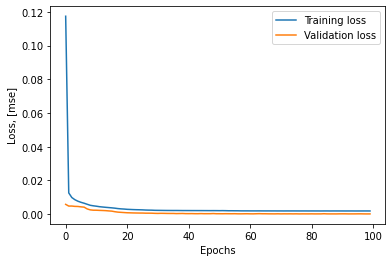

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

In [12]:
pred_train = model.predict(train)

In [13]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

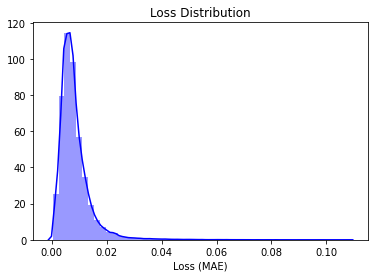

In [14]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [15]:
TH = 0.04
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [16]:
scored_train['Loss_mae'].mean()

0.008252953955151654

Text(0, 0.5, 'Loss (MAE)')

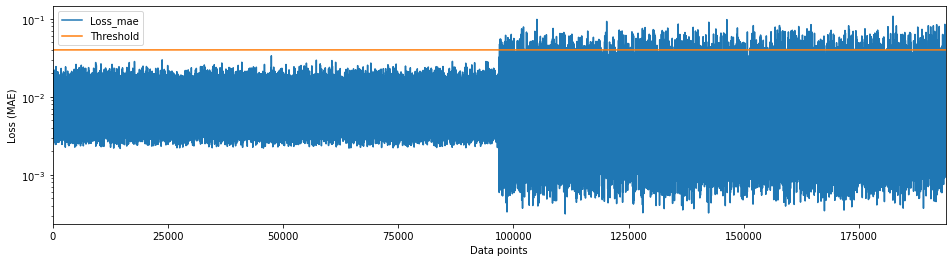

In [17]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [18]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.005730,0.04,False
1,0.010108,0.04,False
2,0.006909,0.04,False
3,0.005278,0.04,False
4,0.005847,0.04,False
...,...,...,...
193843,0.007929,0.04,False
193844,0.022472,0.04,False
193845,0.005343,0.04,False
193846,0.006363,0.04,False


In [19]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
96990   0.045604       0.04     True
97000   0.047507       0.04     True
97115   0.055047       0.04     True
97243   0.054871       0.04     True
97451   0.050407       0.04     True
...          ...        ...      ...
193628  0.063638       0.04     True
193682  0.085016       0.04     True
193687  0.042365       0.04     True
193763  0.042349       0.04     True
193765  0.045800       0.04     True

[920 rows x 3 columns]
(920, 3)


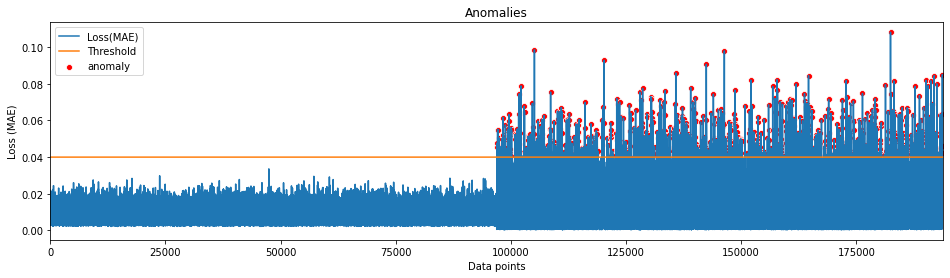

In [20]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [21]:
pred_test = model.predict(test)

In [22]:
score = model.evaluate(test,test)
score

48462/48462 [==============================] - 1s 25us/step


[0.00014187883441114563, 0.9428005218505859]

In [23]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

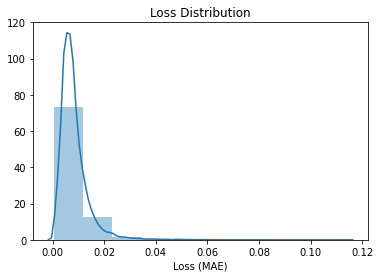

In [24]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [25]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.005646,0.04,False
1,0.006006,0.04,False
2,0.011229,0.04,False
3,0.011882,0.04,False
4,0.003886,0.04,False
...,...,...,...
48457,0.004445,0.04,False
48458,0.003592,0.04,False
48459,0.003828,0.04,False
48460,0.007160,0.04,False


In [26]:
scored_test['Loss_mae'].mean()

0.008230666585674819

Text(0, 0.5, 'Loss (MAE)')

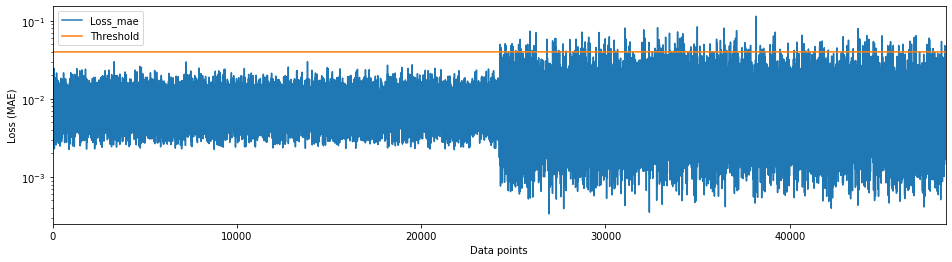

In [27]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [28]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

       Loss_mae  Threshold  Anomaly
24273  0.049836       0.04     True
24324  0.045438       0.04     True
24560  0.051022       0.04     True
24587  0.048419       0.04     True
24738  0.040283       0.04     True
...         ...        ...      ...
47593  0.057323       0.04     True
47782  0.044081       0.04     True
48238  0.054432       0.04     True
48422  0.048064       0.04     True
48425  0.042225       0.04     True

[203 rows x 3 columns]
(203, 3)


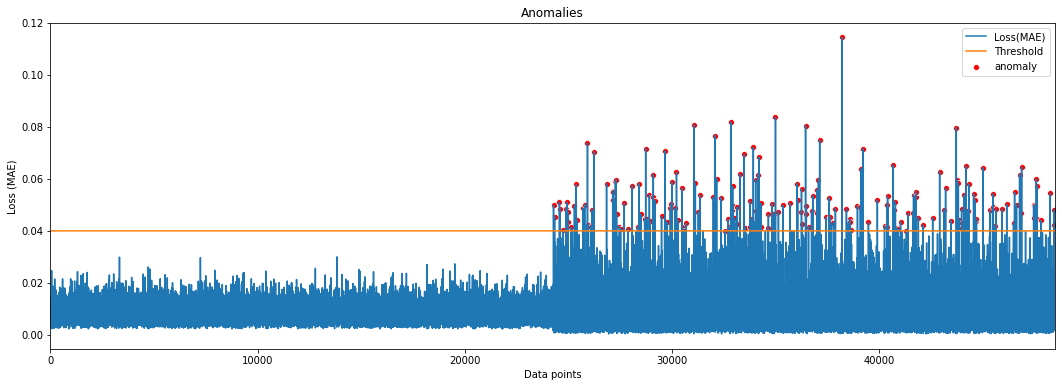

In [29]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [30]:
print(score[1])

0.9428005218505859


In [31]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 94.28%


In [32]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 203


In [33]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [34]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.005646,0.04,False
1,0.006006,0.04,False
2,0.011229,0.04,False
3,0.011882,0.04,False
4,0.003886,0.04,False
...,...,...,...
24226,0.009987,0.04,False
24227,0.008759,0.04,False
24228,0.006458,0.04,False
24229,0.008048,0.04,False


In [35]:
IR_test = scored_test[scored_test.index >= x]
IR_test

,Loss_mae,Threshold,Anomaly
24231,0.008127,0.04,False
24232,0.008144,0.04,False
24233,0.008244,0.04,False
24234,0.008999,0.04,False
24235,0.018164,0.04,False
...,...,...,...
48457,0.004445,0.04,False
48458,0.003592,0.04,False
48459,0.003828,0.04,False
48460,0.007160,0.04,False


In [36]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

FP = normal_test[normal_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

TN = IR_test[IR_test['Anomaly'] == True]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = IR_test[IR_test['Anomaly'] == False]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

True Positives: 24231
False Positives: 0
True Negatives: 203
False Negatives: 24028


In [37]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Accuracy = ( TP + TN ) / ( TP + TN + FN + FP )
print("Accuracy: {:.2f}%".format(Accuracy*100))

Precision: 100.00%
Recall: 50.210%
F1 Score: 66.85%
Accuracy: 50.42%
